In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
#plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
from scipy import stats
import jieba
import wordcloud
import numpy                       
from PIL import Image 

In [2]:
df_ad=pd.read_csv('advertising.csv')
df_ba=pd.read_csv('business_analysis.csv')
df_co=pd.read_csv('content_operation.csv')
df_pm=pd.read_csv('product_manager.csv')
df_pr=pd.read_csv('public_relation.csv')
df_us=pd.read_csv('user_analysis.csv')

In [3]:
df=pd.concat([df_ad,df_ba,df_co,df_us,df_pr,df_pm])
df=df.reset_index(drop=True)
#df.to_csv('shixiseng.csv')
df.head()

,岗位名称,公司名,招聘详情页,薪资,工作地点,身份要求,学历要求,公司规模,公司简介
0,广告,星创传媒,https://www.shixiseng.com/intern/inn_v7dh0tzfx...,7k-9k/月,上海,| 应届生 | 毕业1年内,| 大专,15-50人,锻炼机会多，大专及以上，地铁直达，员工团建，工作氛围活泼，留任发展
1,广告,萌牙科技,https://www.shixiseng.com/intern/inn_yagwygxak...,8k-10k/月,宁波,| 应届生 | 毕业1年内,| 本科,150-500人,创客，福利环境超好，团队努力向上，双休年假，员工团建，节假日福利
2,广告,智岩科技,https://www.shixiseng.com/intern/inn_xdk9pygbl...,7k-9k/月,深圳,| 应届生,| 本科,150-500人,跨境电商，研发型企业，智能硬件
3,广告,CDG,https://www.shixiseng.com/intern/inn_9ljlqtv3q...,6k-8k/月,上海,| 应届生 | 毕业1年内,| 本科,15-50人,弹性办公，年轻活力，国际化视野，数字营销
4,广告,艾砾文化,https://www.shixiseng.com/intern/inn_5y14m6aoc...,3k-4k/月,上海,| 应届生,| 不限,15-50人,广告，学习氛围好，有转正机会，新媒体运营，时间弹性，年轻平等


# data cleaning

In [4]:
#1.education level
df['学历要求'].head()

0    | 大专
1    | 本科
2    | 本科
3    | 本科
4    | 不限
Name: 学历要求, dtype: object

In [5]:
df['学历要求']=df['学历要求'].str.strip('|')
df['学历要求'].head()

0     大专
1     本科
2     本科
3     本科
4     不限
Name: 学历要求, dtype: object

In [6]:
#2.identity
df['身份要求'].head()

0    | 应届生 | 毕业1年内
1    | 应届生 | 毕业1年内
2            | 应届生
3    | 应届生 | 毕业1年内
4            | 应届生
Name: 身份要求, dtype: object

In [7]:
df['身份要求']=df['身份要求'].str.replace("|","")
df['身份要求'].head()

<ipython-input-7-b0f79722d39f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['身份要求']=df['身份要求'].str.replace("|","")


0     应届生  毕业1年内
1     应届生  毕业1年内
2            应届生
3     应届生  毕业1年内
4            应届生
Name: 身份要求, dtype: object

In [8]:
#3.salary
df['最低薪资']=df['薪资'].str.split('-').str.get(0).str.replace('k','000')
df['最低薪资']=pd.to_numeric(df['最低薪资'],errors='coerce')
df['最低薪资'].head()

0    7000.0
1    8000.0
2    7000.0
3    6000.0
4    3000.0
Name: 最低薪资, dtype: float64

In [9]:
df['最高薪资']=df['薪资'].str.split('-').str.get(1).str.replace('k/月','000').fillna("薪资面议")
df['最高薪资']=pd.to_numeric(df['最高薪资'],errors='coerce')
df['最高薪资'].head()

0     9000.0
1    10000.0
2     9000.0
3     8000.0
4     4000.0
Name: 最高薪资, dtype: float64

In [10]:
#4. duplicated items
df.duplicated().head(30)#判断是否有重复项
df.shape

(1200, 11)

In [11]:
df=df.drop(columns=['招聘详情页'])
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df.shape

(876, 10)

In [12]:
df=df[['岗位名称','公司名','工作地点','薪资','最低薪资','最高薪资','身份要求','学历要求','公司规模','公司简介']]
df

,岗位名称,公司名,工作地点,薪资,最低薪资,最高薪资,身份要求,学历要求,公司规模,公司简介
0,广告,星创传媒,上海,7k-9k/月,7000.0,9000.0,应届生 毕业1年内,大专,15-50人,锻炼机会多，大专及以上，地铁直达，员工团建，工作氛围活泼，留任发展
1,广告,萌牙科技,宁波,8k-10k/月,8000.0,10000.0,应届生 毕业1年内,本科,150-500人,创客，福利环境超好，团队努力向上，双休年假，员工团建，节假日福利
2,广告,智岩科技,深圳,7k-9k/月,7000.0,9000.0,应届生,本科,150-500人,跨境电商，研发型企业，智能硬件
3,广告,CDG,上海,6k-8k/月,6000.0,8000.0,应届生 毕业1年内,本科,15-50人,弹性办公，年轻活力，国际化视野，数字营销
4,广告,艾砾文化,上海,3k-4k/月,3000.0,4000.0,应届生,不限,15-50人,广告，学习氛围好，有转正机会，新媒体运营，时间弹性，年轻平等
...,...,...,...,...,...,...,...,...,...,...
871,产品经理,数智交院,杭州,薪资面议,NaN,NaN,,,,
872,产品经理,广州润普,广州,6k-8k/月,6000.0,8000.0,应届生 毕业1年内,大专,150-500人,技术提升快，环境开放，大专及以上
873,产品经理,Moka,北京,薪资面议,NaN,NaN,应届生,不限,150-500人,
874,产品经理,大自然,佛山,5k-7k/月,5000.0,7000.0,应届生,本科,2000人以上,就餐补助，有留用机会


# 数据分析

In [13]:
df_ad=df[df['岗位名称']=='广告']
df_ba=df[df['岗位名称']=='商业分析']
df_co=df[df['岗位名称']=='内容运营']
df_pm=df[df['岗位名称']=='产品经理']
df_pr=df[df['岗位名称']=='公关']
df_us=df[df['岗位名称']=='用户研究']

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '广州'),
  Text(1, 0, '上海'),
  Text(2, 0, '北京'),
  Text(3, 0, '厦门'),
  Text(4, 0, '南宁')])

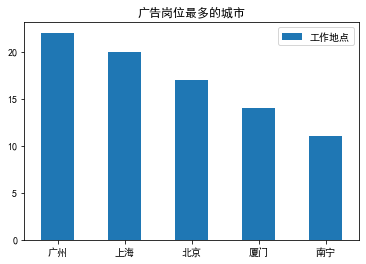

In [46]:
#1.各城市岗位数量排行 (>=10)
df1_1=df_ad['工作地点'].value_counts().head(10)
city1=df1_1[df1_1>=10]
plt.title('广告岗位最多的城市')
city1.plot(kind='bar')
plt.legend(loc='upper right')
plt.xticks(rotation=0)

(array([0, 1, 2]), [Text(0, 0, '北京'), Text(1, 0, '上海'), Text(2, 0, '成都')])

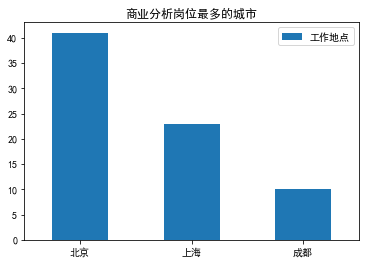

In [15]:
df1_2=df_ba['工作地点'].value_counts().head(10)
city2=df1_2[df1_2>=10]
plt.title('商业分析岗位最多的城市')
city2.plot(kind='bar')
plt.legend(loc='upper right')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '北京'),
  Text(1, 0, '上海'),
  Text(2, 0, '深圳'),
  Text(3, 0, '广州'),
  Text(4, 0, '杭州')])

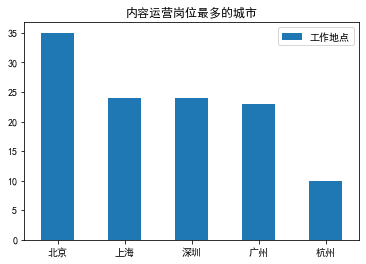

In [16]:
df1_3=df_co['工作地点'].value_counts().head(10)
city3=df1_3[df1_3>=10]
plt.title('内容运营岗位最多的城市')
city3.plot(kind='bar')
plt.legend(loc='upper right')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '厦门'),
  Text(1, 0, '北京'),
  Text(2, 0, '杭州'),
  Text(3, 0, '南宁'),
  Text(4, 0, '上海')])

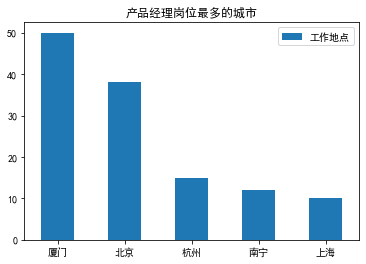

In [17]:
df1_4=df_pm['工作地点'].value_counts().head(10)
city4=df1_4[df1_4>=10]
plt.title('产品经理岗位最多的城市')
city4.plot(kind='bar')
plt.legend(loc='upper right')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '北京'),
  Text(1, 0, '上海'),
  Text(2, 0, '广州'),
  Text(3, 0, '深圳'),
  Text(4, 0, '厦门')])

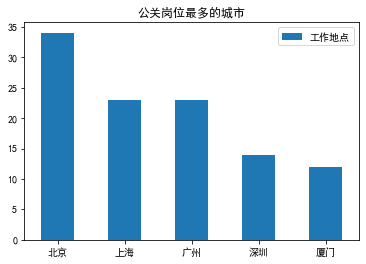

In [18]:
df1_5=df_pr['工作地点'].value_counts().head(10)
city5=df1_5[df1_5>=10]
plt.title('公关岗位最多的城市')
city5.plot(kind='bar')
plt.legend(loc='upper right')
plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, '北京'), Text(1, 0, '广州'), Text(2, 0, '上海'), Text(3, 0, '深圳')])

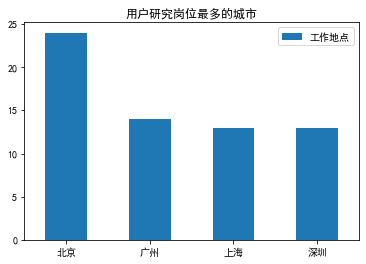

In [19]:
df1_6=df_us['工作地点'].value_counts().head(10)
city6=df1_6[df1_6>=10]
plt.title('用户研究岗位最多的城市')
city6.plot(kind='bar')
plt.legend(loc='upper right')
plt.xticks(rotation=0)

         最低薪资      最高薪资
工作地点                   
北京    9555.56  15555.56
厦门    7083.33  11916.67
广州    6571.43  11357.14
上海    6250.00   9687.50
南宁    5636.36   7636.36
AxesSubplot(0.125,0.125;0.775x0.755)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '北京'),
  Text(1, 0, '厦门'),
  Text(2, 0, '广州'),
  Text(3, 0, '上海'),
  Text(4, 0, '南宁')])

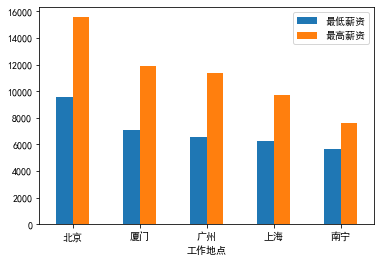

In [20]:
#2.岗位大于10的城市的平均最低薪资和最高工资
df2_1=df_ad.groupby("工作地点").agg({'最低薪资':'mean','最高薪资':'mean'})
df2_1['工作地点']=df2_1.index
cities1=list(city1.index)
salary1=df2_1[df2_1['工作地点'].isin (cities1)]
salary1=salary1.sort_values(by=['最低薪资','最高薪资'],ascending=False).round({'最低薪资':2,'最高薪资':2})
salary1.index=salary1['工作地点']
salary1=salary1.drop(columns=['工作地点'])
print(salary1)
print(salary1.plot(kind='bar'))
plt.xticks(rotation=0)

         最低薪资      最高薪资
工作地点                   
北京    9346.15  14346.15
上海    8357.14  13642.86
成都    6222.22  10444.44
AxesSubplot(0.125,0.125;0.775x0.755)


(array([0, 1, 2]), [Text(0, 0, '北京'), Text(1, 0, '上海'), Text(2, 0, '成都')])

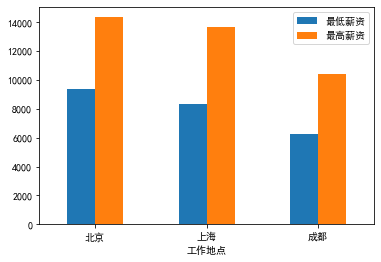

In [21]:
df2_2=df_ba.groupby("工作地点").agg({'最低薪资':'mean','最高薪资':'mean'})
df2_2['工作地点']=df2_2.index
cities2=list(city2.index)
salary2=df2_2[df2_2['工作地点'].isin (cities2)]
salary2=salary2.sort_values(by=['最低薪资','最高薪资'],ascending=False).round({'最低薪资':2,'最高薪资':2})
salary2.index=salary2['工作地点']
salary2=salary2.drop(columns=['工作地点'])
print(salary2)
print(salary2.plot(kind='bar'))
plt.xticks(rotation=0)

         最低薪资      最高薪资
工作地点                   
杭州    8333.33  15333.33
上海    8285.71  11714.29
北京    8055.56  12500.00
深圳    7388.89  11722.22
广州    5200.00   8300.00
AxesSubplot(0.125,0.125;0.775x0.755)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '杭州'),
  Text(1, 0, '上海'),
  Text(2, 0, '北京'),
  Text(3, 0, '深圳'),
  Text(4, 0, '广州')])

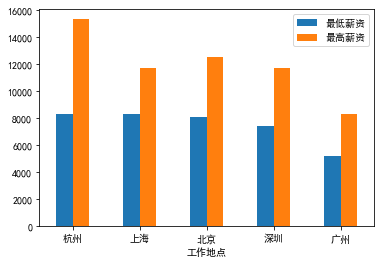

In [22]:
df2_3=df_co.groupby("工作地点").agg({'最低薪资':'mean','最高薪资':'mean'})
df2_3['工作地点']=df2_3.index
cities3=list(city3.index)
salary3=df2_3[df2_3['工作地点'].isin (cities3)]
salary3=salary3.sort_values(by=['最低薪资','最高薪资'],ascending=False).round({'最低薪资':2,'最高薪资':2})
salary3.index=salary3['工作地点']
salary3=salary3.drop(columns=['工作地点'])
print(salary3)
print(salary3.plot(kind='bar'))
plt.xticks(rotation=0)

          最低薪资      最高薪资
工作地点                    
上海    12285.71  19428.57
北京    11600.00  20700.00
杭州     9571.43  15285.71
厦门     8210.53  13763.16
南宁     8181.82  11181.82
AxesSubplot(0.125,0.125;0.775x0.755)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '上海'),
  Text(1, 0, '北京'),
  Text(2, 0, '杭州'),
  Text(3, 0, '厦门'),
  Text(4, 0, '南宁')])

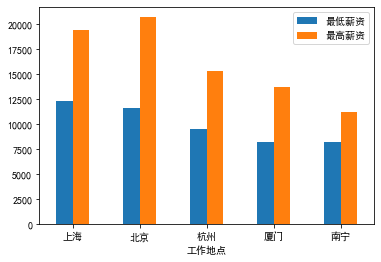

In [23]:
df2_4=df_pm.groupby("工作地点").agg({'最低薪资':'mean','最高薪资':'mean'})
df2_4['工作地点']=df2_4.index
cities4=list(city4.index)
salary4=df2_4[df2_4['工作地点'].isin (cities4)]
salary4=salary4.sort_values(by=['最低薪资','最高薪资'],ascending=False).round({'最低薪资':2,'最高薪资':2})
salary4.index=salary4['工作地点']
salary4=salary4.drop(columns=['工作地点'])
print(salary4)
print(salary4.plot(kind='bar'))
plt.xticks(rotation=0)

          最低薪资      最高薪资
工作地点                    
厦门    10636.36  18818.18
深圳     7000.00  11000.00
北京     6363.64   9909.09
上海     6000.00   9363.64
广州     5894.74   9631.58
AxesSubplot(0.125,0.125;0.775x0.755)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '厦门'),
  Text(1, 0, '深圳'),
  Text(2, 0, '北京'),
  Text(3, 0, '上海'),
  Text(4, 0, '广州')])

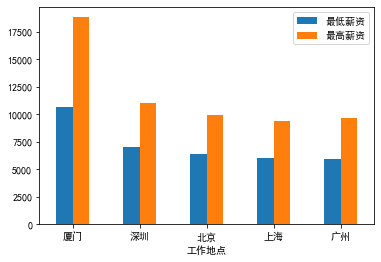

In [24]:
df2_5=df_pr.groupby("工作地点").agg({'最低薪资':'mean','最高薪资':'mean'})
df2_5['工作地点']=df2_5.index
cities5=list(city5.index)
salary5=df2_5[df2_5['工作地点'].isin (cities5)]
salary5=salary5.sort_values(by=['最低薪资','最高薪资'],ascending=False).round({'最低薪资':2,'最高薪资':2})
salary5.index=salary5['工作地点']
salary5=salary5.drop(columns=['工作地点'])
print(salary5)
print(salary5.plot(kind='bar'))
plt.xticks(rotation=0)

          最低薪资     最高薪资
工作地点                   
深圳    10333.33  17000.0
上海    10200.00  16600.0
北京     9166.67  14500.0
广州     6000.00   8250.0
AxesSubplot(0.125,0.125;0.775x0.755)


(array([0, 1, 2, 3]),
 [Text(0, 0, '深圳'), Text(1, 0, '上海'), Text(2, 0, '北京'), Text(3, 0, '广州')])

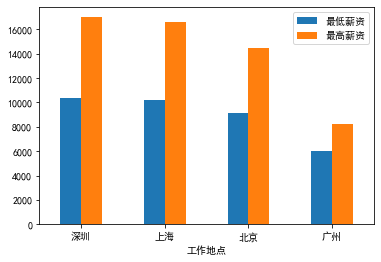

In [25]:
df2_6=df_us.groupby("工作地点").agg({'最低薪资':'mean','最高薪资':'mean'})
df2_6['工作地点']=df2_6.index
cities6=list(city6.index)
salary6=df2_6[df2_6['工作地点'].isin (cities6)]
salary6=salary6.sort_values(by=['最低薪资','最高薪资'],ascending=False).round({'最低薪资':2,'最高薪资':2})
salary6.index=salary6['工作地点']
salary6=salary6.drop(columns=['工作地点'])
print(salary6)
print(salary6.plot(kind='bar'))
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '欢聚集团'),
  Text(1, 0, '一点资讯'),
  Text(2, 0, '雨果网'),
  Text(3, 0, '畅游天下'),
  Text(4, 0, '步步高教育电子'),
  Text(5, 0, '吉比特'),
  Text(6, 0, '友塔游戏'),
  Text(7, 0, '宁道之星')])

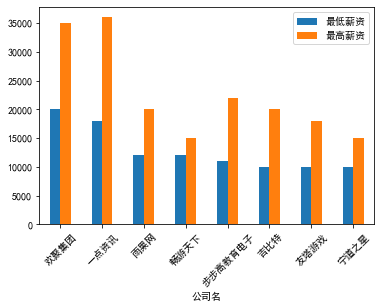

In [26]:
#3.薪资前10的公司信息（先用最低薪资，然后用最高工资排序）及对应公司
df3_1=df_ad.sort_values(by=['最低薪资','最高薪资'],ascending=False).head(10).loc[:,['公司名','工作地点','公司规模','最低薪资','最高薪资','公司简介']]
df3_1.index=df3_1['公司名']
df3_1=df3_1.drop_duplicates(['公司名'])
df3_1.plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '百度'),
  Text(1, 0, ' 广策信息 '),
  Text(2, 0, '十沣科技'),
  Text(3, 0, '行芯科技'),
  Text(4, 0, '掌上先机'),
  Text(5, 0, '衡泰技术'),
  Text(6, 0, '节能减排中心'),
  Text(7, 0, '亮道智能'),
  Text(8, 0, '随训通'),
  Text(9, 0, '拓维信息')])

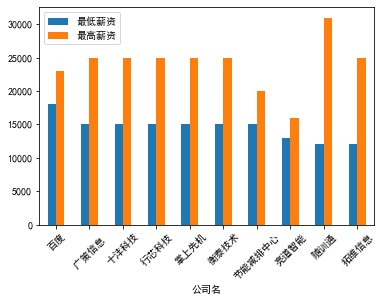

In [27]:
df3_2=df_ba.sort_values(by=['最低薪资','最高薪资'],ascending=False).head(10).loc[:,['公司名','工作地点','公司规模','最低薪资','最高薪资','公司简介']]
df3_2.index=df3_2['公司名']
df3_2=df3_2.drop_duplicates(['公司名'])
df3_2.plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '又为智能'),
  Text(1, 0, '大咖素质训练营'),
  Text(2, 0, '小胖熊'),
  Text(3, 0, '蓝晶微生物'),
  Text(4, 0, '话本小说'),
  Text(5, 0, '迷你玩'),
  Text(6, 0, '好买财富'),
  Text(7, 0, '贝叶智能'),
  Text(8, 0, '同花顺'),
  Text(9, 0, '富途网络')])

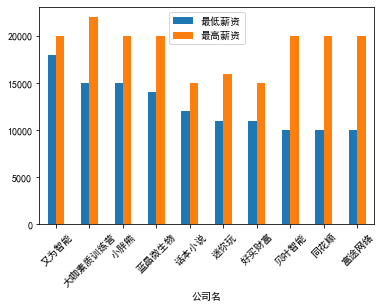

In [28]:
df3_3=df_co.sort_values(by=['最低薪资','最高薪资'],ascending=False).head(10).loc[:,['公司名','工作地点','公司规模','最低薪资','最高薪资','公司简介']]
df3_3.index=df3_3['公司名']
df3_3=df3_3.drop_duplicates(['公司名'])
df3_3.plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '预勾'),
  Text(1, 0, '蓝湖'),
  Text(2, 0, '一束光科技'),
  Text(3, 0, '海豹他趣'),
  Text(4, 0, '那一科技'),
  Text(5, 0, '交个朋友'),
  Text(6, 0, '小胖熊'),
  Text(7, 0, '帆软软件'),
  Text(8, 0, '即时设计'),
  Text(9, 0, 'QTrade')])

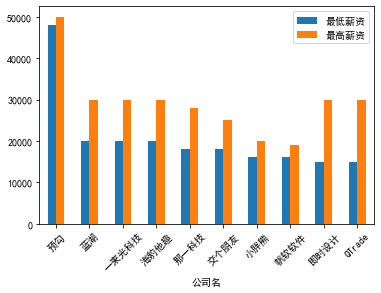

In [29]:
df3_4=df_pm.sort_values(by=['最低薪资','最高薪资'],ascending=False).head(10).loc[:,['公司名','工作地点','公司规模','最低薪资','最高薪资','公司简介']]
df3_4.index=df3_4['公司名']
df3_4=df3_4.drop_duplicates(['公司名'])
df3_4.plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '造化集团'),
  Text(1, 0, '松霖科技'),
  Text(2, 0, '星之辰娱乐'),
  Text(3, 0, '陌推网络'),
  Text(4, 0, '迷你玩'),
  Text(5, 0, '电之美'),
  Text(6, 0, '九牧厨卫'),
  Text(7, 0, '盈峰集团'),
  Text(8, 0, '小雨科技'),
  Text(9, 0, '捷佳润集团')])

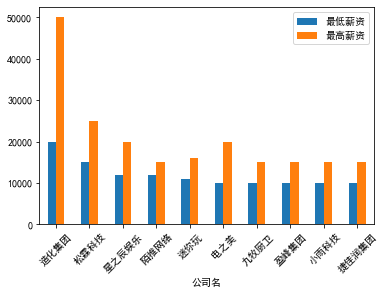

In [30]:
df3_5=df_pr.sort_values(by=['最低薪资','最高薪资'],ascending=False).head(10).loc[:,['公司名','工作地点','公司规模','最低薪资','最高薪资','公司简介']]
df3_5.index=df3_5['公司名']
df3_5=df3_5.drop_duplicates(['公司名'])
df3_5.plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '韶音科技'),
  Text(1, 0, '敦煌网'),
  Text(2, 0, '又为智能'),
  Text(3, 0, '共志通信'),
  Text(4, 0, '畅游天下'),
  Text(5, 0, '步步高教育电子'),
  Text(6, 0, '创梦天地'),
  Text(7, 0, 'AKULAKU'),
  Text(8, 0, '同花顺'),
  Text(9, 0, '京东科技')])

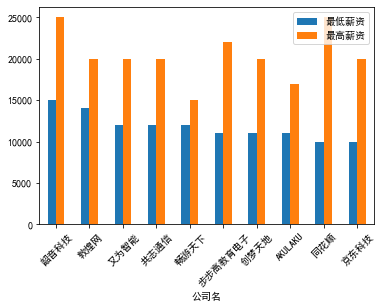

In [31]:
df3_6=df_us.sort_values(by=['最低薪资','最高薪资'],ascending=False).head(10).loc[:,['公司名','工作地点','公司规模','最低薪资','最高薪资','公司简介']]
df3_6.index=df3_6['公司名']
df3_6=df3_6.drop_duplicates(['公司名'])
df3_6.plot(kind='bar')
plt.xticks(rotation=45)

In [32]:
#4.岗位间薪资比较
low_salaries=[round(df_ad['最低薪资'].mean()),round(df_ba['最低薪资'].mean()),round(df_co['最低薪资'].mean()),round(df_pm['最低薪资'].mean()),round(df_pr['最低薪资'].mean()),round(df_us['最低薪资'].mean())]
low_salaries

[6767, 8235, 6605, 9172, 6678, 8025]

In [33]:
high_salaries=[round(df_ad['最高薪资'].mean()),round(df_ba['最高薪资'].mean()),round(df_co['最高薪资'].mean()),round(df_pm['最高薪资'].mean()),round(df_pr['最高薪资'].mean()),round(df_us['最高薪资'].mean())]
high_salaries

[10942, 13327, 10372, 14737, 10724, 12975]

In [34]:
titles=['广告','商业分析','内容运营','产品经理','公关','用户研究']

In [51]:
dict_sal={'position titles':titles,'minimum salaries':low_salaries,'maximum salaries':high_salaries}
sal_rank=pd.DataFrame(dict_sal).sort_values(by=['minimum salaries','maximum salaries'],ascending=False).reset_index(drop=True)
sal_rank.index=['1','2','3','4','5','6']
sal_rank

,position titles,minimum salaries,maximum salaries
1,产品经理,9172,14737
2,商业分析,8235,13327
3,用户研究,8025,12975
4,广告,6767,10942
5,公关,6678,10724
6,内容运营,6605,10372


In [36]:
ano_salary1=[]
df4=df[df['薪资']!='薪资面议']
df4.index=df4['岗位名称']
df4=df4[['岗位名称','最低薪资','最高薪资']]
df4['平均薪资']=(df4['最低薪资']+df4['最高薪资'])/2
df4=df4.dropna()
for i in ['产品经理','商业分析','用户研究','广告','公关','内容运营']:
    ano_salary1.append(df4[df4['岗位名称']==i]['最低薪资'])
f1,p1=stats.f_oneway(*ano_salary1)
stats.f_oneway(*ano_salary1)

F_onewayResult(statistic=7.911182582417013, pvalue=3.51067532598249e-07)

In [37]:
if p1<0.05:
    print('不同行业之间最低薪资具有显著性差异')
else:
    print('不同行业之间最低薪资不具有显著性差异')

不同行业之间最低薪资具有显著性差异


In [38]:
ano_salary2=[]
for i in ['产品经理','商业分析','用户研究','广告','公关','内容运营']:
    ano_salary2.append(df4[df4['岗位名称']==i]['最高薪资'])
f2,p2=stats.f_oneway(*ano_salary2)
stats.f_oneway(*ano_salary2)

F_onewayResult(statistic=8.461683801451995, pvalue=1.0768046716960483e-07)

In [39]:
if p2<0.05:
    print('不同行业之间最高薪资具有显著性差异')
else:
    print('不同行业之间最高薪资不具有显著性差异')

不同行业之间最高薪资具有显著性差异


In [40]:
ano_salary3=[]
for i in ['产品经理','商业分析','用户研究','广告','公关','内容运营']:
    ano_salary3.append(df4[df4['岗位名称']==i]['平均薪资'])
f3,p3=stats.f_oneway(*ano_salary3)
stats.f_oneway(*ano_salary3)

F_onewayResult(statistic=8.738630214489348, pvalue=5.943525844547338e-08)

In [41]:
if p3<0.05:
    print('不同行业之间平均薪资具有显著性差异')
else:
    print('不同行业之间平均薪资不具有显著性差异')

不同行业之间平均薪资具有显著性差异


In [42]:
#5.公司简介词频分析及词云
intro=[]
for i in range(len(df)):
    if df['公司简介'][i]!=' ':
        intro.append(df['公司简介'][i])
#intro

In [43]:
words="".join(intro)
words=jieba.lcut(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\24329\AppData\Local\Temp\jieba.cache
Loading model cost 0.607 seconds.
Prefix dict has been built successfully.


In [52]:
counts={}
for word in words:
    if len(word)==1:
        continue
    else:
        counts[word]=counts.get(word,0)+1
items=list(counts.items())
items.sort(key=lambda x:x[1],reverse=True)
for i in range(15):
    word,count=items[i]
    print("{0:<10}{1:>5}".format(word,count))

团队          115
福利           86
氛围           85
环境           84
机会           76
amp          76
工作           57
年轻           57
实习           57
五险           53
成长           53
发展           50
活力           50
双休           49
一金           49


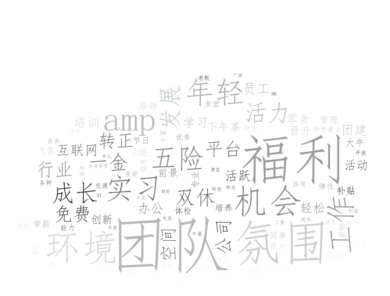

In [45]:
background='BMW 6.jpg'
mask = numpy.array(Image.open(background))
number=100
wc = wordcloud.WordCloud(
    font_path = 'C:/Windows/Fonts/simfang.ttf', 
    background_color='white',                  
    mask = mask,                               
    max_words = number,                      
    max_font_size = 150                         
)

wc.generate_from_frequencies(counts)                                      
wc.recolor(color_func=wordcloud.ImageColorGenerator(mask))                    
plt.figure('词云')                                                              
plt.subplots_adjust(top=0.99,bottom=0.01,right=0.99,left=0.01,hspace=0,wspace=0) 
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')                      
plt.axis('off')                                                                  
plt.show() 